In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import pandas as pd


# Historical daily data from 2020 to 2024

In [8]:
stocks = ["MSFT","NVDA","AMD","SSL","AAPL","GOOG","AMZN","ASML","LL6A.SG","PFE","AVGO", "DELL","INTC"]
data = yf.download(stocks, start="2020-06-01", end="2024-09-01", interval="1d")

[*********************100%***********************]  13 of 13 completed


In [9]:
data.head()

Price                      Adj Close                                     \
Ticker                          AAPL        AMD        AMZN        ASML   
Date                                                                      
2020-06-01 00:00:00+00:00  78.490059  53.630001  123.552002  314.641266   
2020-06-02 00:00:00+00:00  78.853401  53.540001  123.620499  322.345306   
2020-06-03 00:00:00+00:00  79.287491  52.730000  123.919998  333.487183   
2020-06-04 00:00:00+00:00  78.604668  52.630001  123.029999  340.045197   
2020-06-05 00:00:00+00:00  80.843407  53.099998  124.150002  344.003143   

Price                                                                  \
Ticker                          AVGO       DELL       GOOG       INTC   
Date                                                                    
2020-06-01 00:00:00+00:00  25.754511  23.439184  71.415619  55.144669   
2020-06-02 00:00:00+00:00  26.471222  23.334732  71.784706  55.376442   
2020-06-03 00:00:00+00:00  27.489891  23.173313  71.643059  55.207069   
2020-06-04 00:00:00+00:00  27.433052  23.358477  70.436020  56.134171   
2020-06-05 00:00:00+00:00  28.160421  23.985161  71.743309  57.355434   

Price                                            ...    Volume              \
Ticker                      LL6A.SG        MSFT  ...      ASML        AVGO   
Date                                             ...                         
2020-06-01 00:00:00+00:00       NaN  176.192230  ...  526100.0  18444000.0   
2020-06-02 00:00:00+00:00  2.497088  178.196701  ...  717200.0  31847000.0   
2020-06-03 00:00:00+00:00  2.606450  178.630356  ...  693900.0  31926000.0   
2020-06-04 00:00:00+00:00  2.715811  176.278931  ...  884600.0  34997000.0   
2020-06-05 00:00:00+00:00  2.642904  180.403580  ...  899200.0  50958000.0   

Price                                                                 \
Ticker                          DELL        GOOG        INTC LL6A.SG   
Date                                                                   
2020-06-01 00:00:00+00:00  7528179.0  24342000.0  14317700.0     NaN   
2020-06-02 00:00:00+00:00  5828439.0  25562000.0  20702400.0     0.0   
2020-06-03 00:00:00+00:00  5198658.0  25124000.0  16737300.0     0.0   
2020-06-04 00:00:00+00:00  5245812.0  29686000.0  22010100.0     0.0   
2020-06-05 00:00:00+00:00  8202353.0  34698000.0  26813100.0     0.0   

Price                                                                       
Ticker                           MSFT         NVDA         PFE         SSL  
Date                                                                        
2020-06-01 00:00:00+00:00  22622400.0  389876000.0  76884979.0   4799100.0  
2020-06-02 00:00:00+00:00  30794600.0  391320000.0  42690900.0   9595100.0  
2020-06-03 00:00:00+00:00  27311000.0  365440000.0  38751996.0   8623800.0  
2020-06-04 00:00:00+00:00  28761800.0  424280000.0  27013388.0  10262500.0  
2020-06-05 00:00:00+00:00  39893600.0  481748000.0  36705655.0  11985800.0  

[5 rows x 78 columns]

In [10]:
df = data['Adj Close']
df.columns

Index(['AAPL', 'AMD', 'AMZN', 'ASML', 'AVGO', 'DELL', 'GOOG', 'INTC',
       'LL6A.SG', 'MSFT', 'NVDA', 'PFE', 'SSL'],
      dtype='object', name='Ticker')

# Adjusted pricing of subset of 5 stocks and Estimated Total returns

In [11]:
df_portfolio = df[['AAPL','PFE','NVDA','SSL','LL6A.SG']]
df_portfolio.columns

Index(['AAPL', 'PFE', 'NVDA', 'SSL', 'LL6A.SG'], dtype='object', name='Ticker')

In [12]:
df_portfolio = df[['AAPL','PFE','NVDA','SSL','LL6A.SG']]
df_portfolio.columns = ['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']
df_portfolio.head()

,Apple,Pfizer,Nvidia,Sasol,MTN
Date,,,,,
2020-06-01 00:00:00+00:00,78.490059,28.140842,8.775337,5.176856,NaN
2020-06-02 00:00:00+00:00,78.853401,28.696348,8.794270,6.071837,2.497088
2020-06-03 00:00:00+00:00,79.287491,28.696348,8.738713,6.721138,2.606450
2020-06-04 00:00:00+00:00,78.604668,28.577318,8.739712,7.019465,2.715811
2020-06-05 00:00:00+00:00,80.843407,28.561441,8.892744,7.940770,2.642904


In [13]:
# Total daily returns = daily price of stock

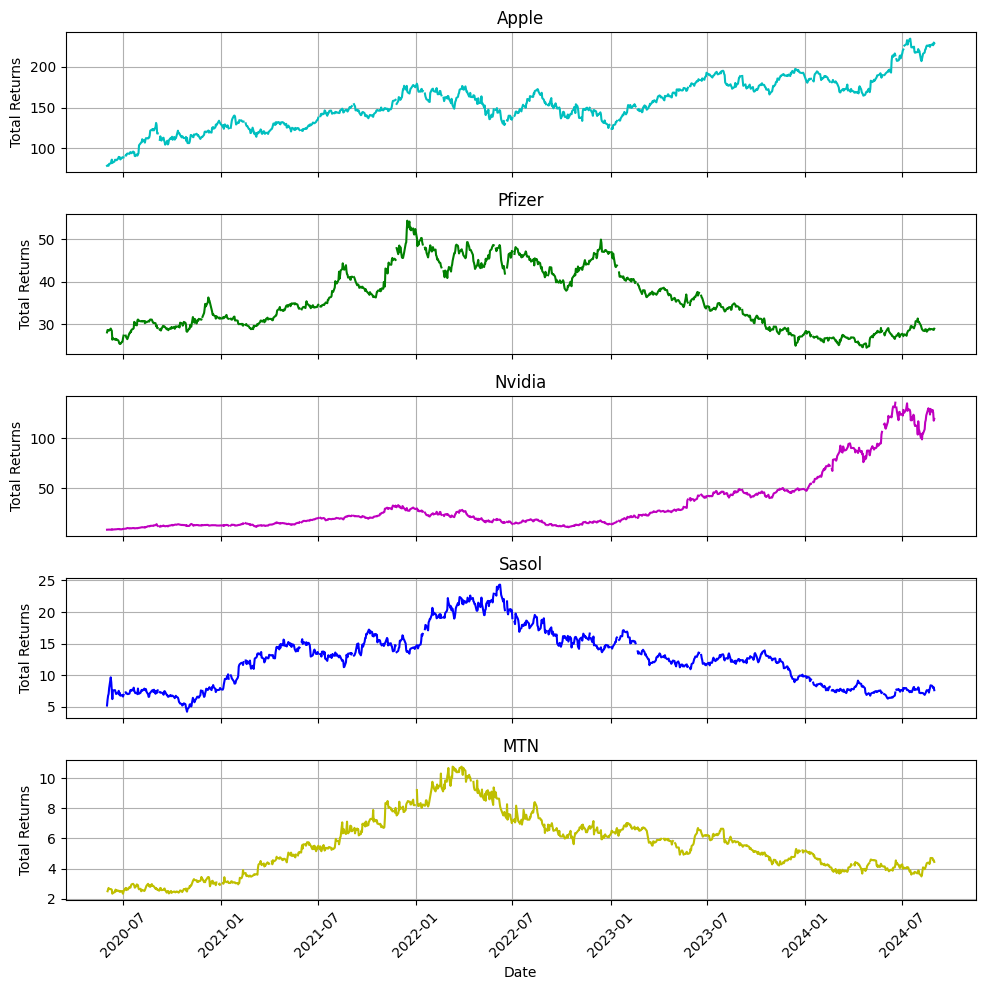

In [14]:
#Create a 5x1 grid of subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

#Define the colors for each stock
colors = ['c', 'g', 'm', 'b', 'y']

#Plot each stock's total returns in a separate subplot
stocks = df_portfolio.columns
for i, stock in enumerate(stocks):
    axs[i].plot(df_portfolio.index, df_portfolio[stock], label=stock, color=colors[i])
    axs[i].set_title(stock)
    axs[i].set_ylabel('Total Returns')
    axs[i].grid(True)  # Add grid lines
    axs[i].tick_params(axis='x', rotation=45)

#Adjust layout and show the plot
axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

In [15]:
# total returns = price_t/price_t-1
# R = X1/X0 - investment at t=0 and payouyt received at t=1
#total_returns = df_portfolio[['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']] / df_portfolio[['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']].shift(1)

In [16]:
# pct_change calculates percentage change between consecutive rows (X1-X0/X0)
rate_of_return = df_portfolio[['Apple', 'Pfizer', 'Nvidia','Sasol','MTN']].pct_change(fill_method=None)
rate_of_return.head()

,Apple,Pfizer,Nvidia,Sasol,MTN
Date,,,,,
2020-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-06-02 00:00:00+00:00,0.004629,0.019740,0.002157,0.172881,NaN
2020-06-03 00:00:00+00:00,0.005505,0.000000,-0.006317,0.106936,0.043796
2020-06-04 00:00:00+00:00,-0.008612,-0.004148,0.000114,0.044386,0.041958
2020-06-05 00:00:00+00:00,0.028481,-0.000556,0.017510,0.131250,-0.026846


In [17]:
rate_of_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1100 entries, 2020-06-01 00:00:00+00:00 to 2024-08-30 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Apple   1041 non-null   float64
 1   Pfizer  1041 non-null   float64
 2   Nvidia  1041 non-null   float64
 3   Sasol   1041 non-null   float64
 4   MTN     1076 non-null   float64
dtypes: float64(5)
memory usage: 51.6 KB


# Portfolio Optimisation Components

In [18]:
rate_of_return =rate_of_return.dropna()

In [19]:
rate_of_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018 entries, 2020-06-03 00:00:00+00:00 to 2024-08-30 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Apple   1018 non-null   float64
 1   Pfizer  1018 non-null   float64
 2   Nvidia  1018 non-null   float64
 3   Sasol   1018 non-null   float64
 4   MTN     1018 non-null   float64
dtypes: float64(5)
memory usage: 47.7 KB


In [20]:
expected_return = rate_of_return.mean()*252 # annualised expected return

In [21]:
expected_return

,0
Apple,0.330603
Pfizer,0.063062
Nvidia,0.760055
Sasol,0.276808
MTN,0.194178


In [22]:
np.round(expected_return*100,2)

,0
Apple,33.06
Pfizer,6.31
Nvidia,76.01
Sasol,27.68
MTN,19.42


In [23]:
# Annualized Covariance Matrix=Daily Covariance Matrix×252

covarriance_matrix = rate_of_return.cov()*252

In [24]:
covarriance_matrix

,Apple,Pfizer,Nvidia,Sasol,MTN
Apple,0.084517,0.012557,0.086036,0.025356,0.012873
Pfizer,0.012557,0.064140,0.007489,0.021380,0.012757
Nvidia,0.086036,0.007489,0.277771,0.040042,0.030881
Sasol,0.025356,0.021380,0.040042,0.322811,0.074076
MTN,0.012873,0.012757,0.030881,0.074076,0.264599


In [25]:
np.round(covarriance_matrix,4)

,Apple,Pfizer,Nvidia,Sasol,MTN
Apple,0.0845,0.0126,0.0860,0.0254,0.0129
Pfizer,0.0126,0.0641,0.0075,0.0214,0.0128
Nvidia,0.0860,0.0075,0.2778,0.0400,0.0309
Sasol,0.0254,0.0214,0.0400,0.3228,0.0741
MTN,0.0129,0.0128,0.0309,0.0741,0.2646


In [26]:
# Number of assets and weights initialisation
num_assets = len(expected_return)
weights = np.random.dirichlet(np.ones(num_assets), size=1)[0] # generate weights using Dirichlet distribution
#weights = np.array([1/num_assets] * num_assets)
weights= np.round(weights,3)

In [27]:
num_assets, weights

(5, array([0.004, 0.103, 0.021, 0.308, 0.565]))

## Portfolio varriance/risk inputs:
1.   covarriance matrix
2.   portfolio weights
**portfolio_variance**  = weights * covarriance_matrix * weights_T  -- want to minimise

## Sharpe ratio inputs:
portfolio_expected_returns = product_sum(weights,expected_return)  -- want to maximise
portfolio_standard_deviation = root(portfolio_variance) -- want minimised with portfolio risk

**Sharpe_ratio  = portfolio_expected_returns/portfolio_standard_deviation**

# Objective Function:

## minimise portfolio risk :
portfolio_variance = weights * covarriance_matrix * weights_T *

## Subject to


*   Expected_return*weights >= R (can be minimum portfolio return or median return)
*   sum_weights = 1 -- allocate all funds
*   wieghts >= 0  -- optional, means no short selling


In [28]:
# Define objective function = portfolio variance (risk)
def portfolio_variance(weights, covarriance_matrix):
    cov_matrix = covarriance_matrix #* 100  # Scale the covariance matrix if necessary
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_variance

# Define the expected portfolio return
def portfolio_return(weights, expected_return):
    portfolio_return = np.dot(weights, expected_return)
    return portfolio_return

# Median return constraint: portfolio return >= median return (R)
def return_constraint(weights, expected_return, R):
    return portfolio_return(weights, expected_return) - R

# Give constarint R - want it to be better than the median E(r) or minium E(r)
R = np.median(expected_return)

# Define obj func constraints:
constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (expected_return, R)}  # Return constraint
]

# Define bounds: weights between 0 and 1 (long-only portfolio / no short-selling)
bounds = tuple((0, 1) for asset in range(num_assets))

# Define bounds: weights not bounded (with short-selling)
#bounds = None

In [29]:
# Minimize the portfolio variance subject to the new constraint
result = minimize(portfolio_variance, weights, args=(covarriance_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimal_weights = result.x

# Get optimized varriance
portfolio_varriance = result.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance,3))
# Calculate the expected portfolio returns with optimised weights

optimised_portfolio_returns = portfolio_return(optimal_weights, expected_return)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns*100,3),'%')

Optimised portfolio weights: [0.352 0.372 0.14  0.052 0.085]
Optimised portfolio varriance: 0.045
Optimised portfolio returns: 27.681 %


# Efficient Front Plot

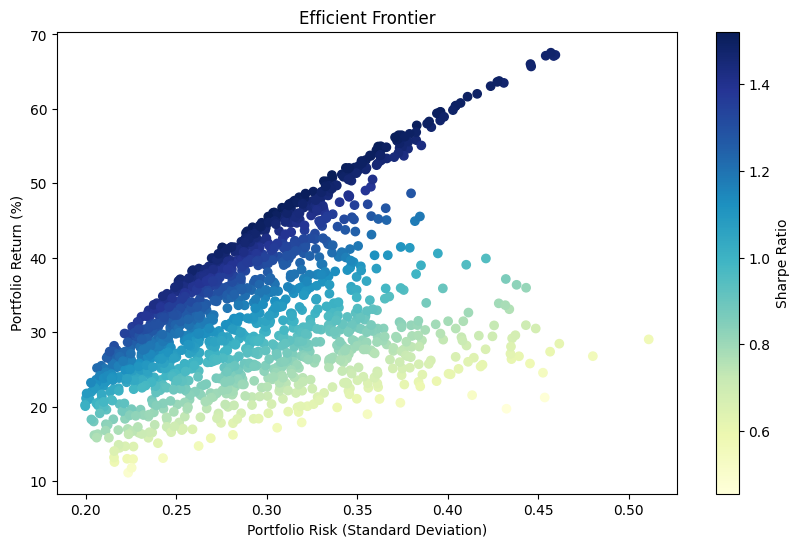

In [30]:
# Define the number of portfolios to simulate
num_portfolios = 1500
weights_record = np.zeros((num_portfolios, num_assets))

# Initialize arrays to hold results
results = np.zeros((3, num_portfolios))  # [Portfolio Return, Portfolio Variance, Portfolio Std Dev]

# Generate random portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights_ef = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    weights_record[i] = weights_ef  # Store weights for reference

    # Calculate portfolio return and variance
    port_return = portfolio_return(weights_ef, expected_return)
    port_variance = portfolio_variance(weights_ef, covarriance_matrix)
    port_std_dev = np.sqrt(port_variance)

    # Store results
    results[0, i] = port_return
    results[1, i] = port_variance
    results[2, i] = port_std_dev

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[2, :], results[0, :]*100, c=results[0, :] / results[2, :], marker='o', cmap='YlGnBu')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return (%)')

# Display the plot
plt.show()

In [31]:
results

array([[0.66016724, 0.34030073, 0.27696173, ..., 0.2885195 , 0.30497775,
        0.2830829 ],
       [0.19868766, 0.06465381, 0.17718448, ..., 0.0756825 , 0.07193104,
        0.06586338],
       [0.44574394, 0.25427114, 0.42093287, ..., 0.27510452, 0.26819962,
        0.25663862]])

In [32]:
# Finding efficient portfolios with highest Sharpe Ratio
def find_efficient_portfolios(results, weights_record, num_top=5):
    sharpe_ratios = results[0, :] / results[2, :]  # Calculate Sharpe Ratios
    top_indices = np.argsort(sharpe_ratios)[-num_top:]  # Get indices of top portfolios
    return weights_record[top_indices], results[:, top_indices]  # Return weights and results

# Fidning top efficient portfolios based on Sharpe Ratio
num_top = 5
top_weights, top_results = find_efficient_portfolios(results, weights_record, num_top=num_top)
returns = np.round(top_results[0, :],3)
variances = np.round(top_results[2, :],3)

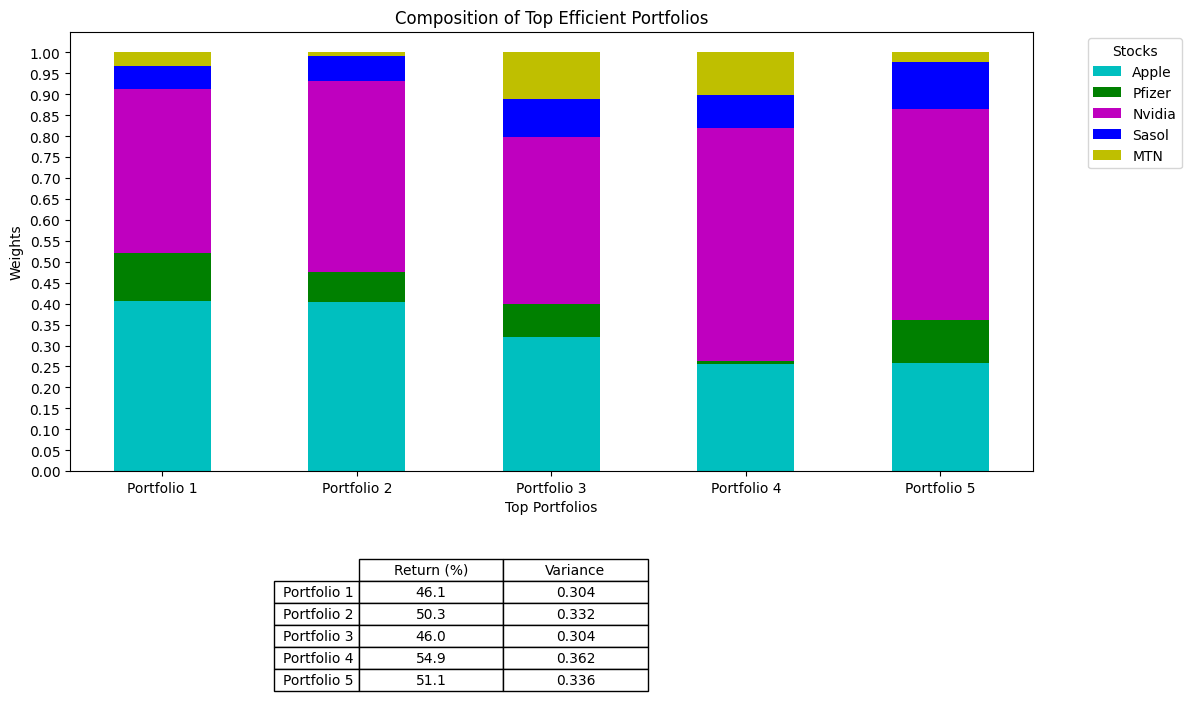

In [33]:
# Plotting portfolio composition graph
plt.figure(figsize=(12, 8))
# Stack weights for each portfolio
bar_width = 0.5
indices = np.arange(num_top)
bottoms = np.zeros(num_top)
asset_names = ['Apple', 'Pfizer', 'Nvidia', 'Sasol', 'MTN']

for i in range(top_weights.shape[1]):
    plt.bar(indices, top_weights[:, i], bar_width, bottom=bottoms, color=colors[i % len(colors)], label=asset_names[i])
    bottoms += top_weights[:, i]

plt.xticks(indices, [f'Portfolio {i+1}' for i in range(num_top)])
plt.xlabel('Top Portfolios')
plt.ylabel('Weights')
plt.yticks(np.arange(0, 1.05, 0.05))  # Adjust this range and step as needed
plt.title('Composition of Top Efficient Portfolios')

# Add a table with returns and variances
table_data = np.array([np.round(returns*100,3), variances]).T
table = plt.table(cellText=table_data, colLabels=['Return (%)', 'Variance'],
                  rowLabels=[f'Portfolio {i+1}' for i in range(num_top)],
                  cellLoc='center', loc='bottom', bbox=[0.3, -0.5, 0.3, 0.3])

# Move the legend to the right side of the plot
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Internet Data and the large-scale portfolio optimisation problem

Beta's of securitie Paramter estimation:

individual assets:
rate_of_return_t - risk-free_assest_t = beta (market_return_t - risk-free_assest_t)

using E(r):

Mean_expected_return - E(rf) = beta(E(rm))-E(rf)

Exercise 8.6 Express the following restrictions as linear constraints:
(I)
(II)


## Solve Markowitz’MVOmodel to construct a portfolio of stocks from the DJIA that has expected return at least R

In [34]:
df.columns

Index(['AAPL', 'AMD', 'AMZN', 'ASML', 'AVGO', 'DELL', 'GOOG', 'INTC',
       'LL6A.SG', 'MSFT', 'NVDA', 'PFE', 'SSL'],
      dtype='object', name='Ticker')

In [36]:
#["MSFT","NVDA","AMD","SSL","AAPL","GOOG","AMZN","ASML","LL6A.SG","PFE","AVGO", "DELL","INTC"]
#["Microsoft","NVIDIA","AMD","Sasol","Apple","Google","Amazon","ASML","MTN","Pfizer","Broadcom ", "Dell","Intel "]
df.columns = ["Apple","AMD","Amazon","ASML","Broadcom","Dell","Google","Intel","MTN","Microsoft ", "NVIDIA","Pfizer","Sasol"]
df.head()

,Apple,AMD,Amazon,ASML,Broadcom,Dell,Google,Intel,MTN,Microsoft,NVIDIA,Pfizer,Sasol
Date,,,,,,,,,,,,,
2020-06-01 00:00:00+00:00,78.490059,53.630001,123.552002,314.641266,25.754511,23.439184,71.415619,55.144669,NaN,176.192230,8.775337,28.140842,5.176856
2020-06-02 00:00:00+00:00,78.853401,53.540001,123.620499,322.345306,26.471222,23.334732,71.784706,55.376442,2.497088,178.196701,8.794270,28.696348,6.071837
2020-06-03 00:00:00+00:00,79.287491,52.730000,123.919998,333.487183,27.489891,23.173313,71.643059,55.207069,2.606450,178.630356,8.738713,28.696348,6.721138
2020-06-04 00:00:00+00:00,78.604668,52.630001,123.029999,340.045197,27.433052,23.358477,70.436020,56.134171,2.715811,176.278931,8.739712,28.577318,7.019465
2020-06-05 00:00:00+00:00,80.843407,53.099998,124.150002,344.003143,28.160421,23.985161,71.743309,57.355434,2.642904,180.403580,8.892744,28.561441,7.940770


In [37]:
r_it = df[["Apple","AMD","Amazon","ASML","Broadcom","Dell","Google","Intel","MTN","Microsoft ", "NVIDIA","Pfizer","Sasol"]].pct_change(fill_method=None)
r_it =r_it.dropna()
mean_expected_return = r_it.mean()*252 # annualised expected return
covar_matrix = r_it.cov()*252
# Number of assets and weights initialisation
n = len(mean_expected_return)
init_weights = np.random.dirichlet(np.ones(n), size=1)[0] # generate weights using Dirichlet distribution
#weights = np.array([1/num_assets] * num_assets)

init_weights= np.round(init_weights,3)

In [38]:
init_weights

array([0.111, 0.009, 0.139, 0.114, 0.138, 0.074, 0.038, 0.031, 0.005,
       0.147, 0.052, 0.035, 0.107])

In [39]:
mean_expected_return

,0
Apple,0.330603
AMD,0.357836
Amazon,0.106324
ASML,0.337565
Broadcom,0.548270
Dell,0.458610
Google,0.210413
Intel,-0.154381
MTN,0.194178
Microsoft,0.253833


In [40]:
np.round(covar_matrix,4)

,Apple,AMD,Amazon,ASML,Broadcom,Dell,Google,Intel,MTN,Microsoft,NVIDIA,Pfizer,Sasol
Apple,0.0845,0.0792,0.0615,0.0659,0.0565,0.0396,0.0530,0.0464,0.0129,0.0544,0.0860,0.0126,0.0254
AMD,0.0792,0.2654,0.1009,0.1374,0.1103,0.0809,0.0828,0.0861,0.0201,0.0807,0.2006,0.0126,0.0503
Amazon,0.0615,0.1009,0.1288,0.0829,0.0650,0.0481,0.0715,0.0560,0.0144,0.0671,0.1099,0.0093,0.0290
ASML,0.0659,0.1374,0.0829,0.1666,0.1014,0.0762,0.0675,0.0858,0.0290,0.0692,0.1529,0.0131,0.0572
Broadcom,0.0565,0.1103,0.0650,0.1014,0.1249,0.0707,0.0523,0.0697,0.0211,0.0559,0.1284,0.0088,0.0429
Dell,0.0396,0.0809,0.0481,0.0762,0.0707,0.1749,0.0401,0.0579,0.0223,0.0410,0.0925,0.0091,0.0522
Google,0.0530,0.0828,0.0715,0.0675,0.0523,0.0401,0.0948,0.0473,0.0181,0.0597,0.0904,0.0130,0.0401
Intel,0.0464,0.0861,0.0560,0.0858,0.0697,0.0579,0.0473,0.1593,0.0257,0.0468,0.0875,0.0147,0.0535
MTN,0.0129,0.0201,0.0144,0.0290,0.0211,0.0223,0.0181,0.0257,0.2646,0.0089,0.0309,0.0128,0.0741
Microsoft,0.0544,0.0807,0.0671,0.0692,0.0559,0.0410,0.0597,0.0468,0.0089,0.0746,0.0937,0.0125,0.0232


In [41]:
R_i = np.median(mean_expected_return)
# Define obj func constraints:
constraints = [
    {'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (mean_expected_return, R_i)}  # Return constraint
]

# Define bounds: weights between 0 and 1 (long-only portfolio / no short-selling)
bounds = tuple((0, 1) for asset in range(n))

In [42]:
# Minimize the portfolio variance subject to the new constraint
result = minimize(portfolio_variance, init_weights, args=(covar_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Get optimized weights
optimal_weights = result.x

# Get optimized varriance
portfolio_varriance = result.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance,3))
# Calculate the expected portfolio returns with optimised weights
optimised_portfolio_returns = portfolio_return(optimal_weights, mean_expected_return)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns*100,3),'%')

Optimised portfolio weights: [0.183 0.    0.    0.    0.188 0.099 0.    0.    0.076 0.109 0.    0.328
 0.018]
Optimised portfolio varriance: 0.039
Optimised portfolio returns: 27.681 %


Generate a random value uniformly in the interval [0.95μi , 1.05μi ], for each
stock i . Resolve Markowitz’ MVO model with these mean returns, instead of
μi ’s as in (i). Compare the results obtained in (i) and (ii).

In [43]:
random_returns = np.random.uniform(0.95 * mean_expected_return, 1.05 * mean_expected_return)
random_returns

array([ 0.32247796,  0.37340843,  0.11014267,  0.35368819,  0.53886321,
        0.45848316,  0.20825902, -0.15143568,  0.19807199,  0.24318546,
        0.76208663,  0.06002765,  0.2904841 ])

In [44]:
# Give constarint R - want it to be better than the median E(r) or minium E(r)
R_ii = np.median(random_returns)

# Define obj func constraints:
constraints_ii = [
    {'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': return_constraint, 'args': (random_returns, R_ii)}  # Return constraint
]

# Define bounds: weights between 0 and 1 (long-only portfolio / no short-selling)
bounds_ii = tuple((0, 1) for asset in range(n))

# Define bounds: weights not bounded (with short-selling)
#bounds = None
# Minimize the portfolio variance subject to the new constraint
result_ii = minimize(portfolio_variance, init_weights, args=(covar_matrix,), method='SLSQP', bounds=bounds_ii, constraints=constraints_ii)

# Get optimized weights
optimal_weights_ii = result_ii.x

# Get optimized varriance
portfolio_varriance_ii = result_ii.fun

# Output results
print("Optimised portfolio weights:", np.round(optimal_weights_ii,3))
print("Optimised portfolio varriance:", np.round(portfolio_varriance_ii,3))
# Calculate the expected portfolio returns with optimised weights
optimised_portfolio_returns_ii = portfolio_return(optimal_weights_ii, random_returns)
print("Optimised portfolio returns:", np.round(optimised_portfolio_returns_ii*100,3),'%')

Optimised portfolio weights: [0.193 0.    0.    0.    0.214 0.108 0.    0.    0.074 0.073 0.008 0.308
 0.022]
Optimised portfolio varriance: 0.041
Optimised portfolio returns: 29.048 %


In [45]:
# Store all the portfolios found in (i), (ii), and three more repetitions
comb_portfolio_weights = [optimal_weights, optimal_weights_ii]
comb_portfolio_returns = [optimised_portfolio_returns, optimised_portfolio_returns_ii]
comb_portfolio_varriance = [portfolio_varriance, portfolio_varriance_ii]


# Repeat the process three more times
for _ in range(3):
    random_return_iii = np.random.uniform(0.95 * mean_expected_return, 1.05 * mean_expected_return)
    R_iii = np.median(random_return_iii)
    constraints_iii = [{'type': 'eq', 'fun': lambda init_weights: np.sum(init_weights) - 1},
                      {'type': 'ineq', 'fun': return_constraint, 'args': (random_return_iii, R_iii)} ]

    results_iii = minimize(portfolio_variance, init_weights, args=(covar_matrix,),
                        method='SLSQP', bounds=bounds_ii, constraints=constraints_iii)
    comb_portfolio_weights.append(results_iii.x)
    comb_portfolio_varriance.append(results_iii.fun)
    comb_portfolio_returns.append(portfolio_return(results_iii.x, random_return_iii))


comb_portfolio_weights_print = np.round(comb_portfolio_weights,4)
comb_portfolio_returns_print = np.round(comb_portfolio_returns,4)
comb_portfolio_varriance_print = np.round(comb_portfolio_varriance,4)

In [46]:
full_results = pd.DataFrame({'Portfolio Returns (%)':comb_portfolio_returns_print*100, 'Portfolio Varriance':comb_portfolio_varriance_print })
full_results.index = [1,2,3,4,5]

In [47]:
full_results

,Portfolio Returns (%),Portfolio Varriance
1,27.68,0.0390
2,29.05,0.0410
3,27.37,0.0386
4,28.78,0.0402
5,27.60,0.0392


In [53]:
full_weights = pd.DataFrame(comb_portfolio_weights_print)
full_weights.columns = ["Apple","AMD","Amazon","ASML","Broadcom","Dell","Google","Intel","MTN","Microsoft ", "NVIDIA","Pfizer","Sasol"]
full_weights.index = [1,2,3,4,5]
full_weights

,Apple,AMD,Amazon,ASML,Broadcom,Dell,Google,Intel,MTN,Microsoft,NVIDIA,Pfizer,Sasol
1,0.1835,0.0,0.0,0.0,0.1877,0.0990,0.0,0.0,0.0756,0.1086,0.0000,0.3279,0.0177
2,0.1933,0.0,0.0,0.0,0.2140,0.1085,0.0,0.0,0.0740,0.0731,0.0076,0.3076,0.0219
3,0.1781,0.0,0.0,0.0,0.1865,0.0957,0.0,0.0,0.0759,0.1084,0.0000,0.3383,0.0171
4,0.1960,0.0,0.0,0.0,0.2123,0.0989,0.0,0.0,0.0719,0.0903,0.0000,0.3097,0.0210
5,0.2020,0.0,0.0,0.0,0.1853,0.1010,0.0,0.0,0.0757,0.0963,0.0000,0.3214,0.0182


In [54]:
full_weights = full_weights.loc[:, (full_weights != 0).any()]
full_weights

,Apple,Broadcom,Dell,MTN,Microsoft,NVIDIA,Pfizer,Sasol
1,0.1835,0.1877,0.0990,0.0756,0.1086,0.0000,0.3279,0.0177
2,0.1933,0.2140,0.1085,0.0740,0.0731,0.0076,0.3076,0.0219
3,0.1781,0.1865,0.0957,0.0759,0.1084,0.0000,0.3383,0.0171
4,0.1960,0.2123,0.0989,0.0719,0.0903,0.0000,0.3097,0.0210
5,0.2020,0.1853,0.1010,0.0757,0.0963,0.0000,0.3214,0.0182


In [55]:
avg_w = full_weights.mean()
np.round(avg_w,4)

,0
Apple,0.1906
Broadcom,0.1972
Dell,0.1006
MTN,0.0746
Microsoft,0.0953
NVIDIA,0.0015
Pfizer,0.3210
Sasol,0.0192


In [56]:
# Average the performace of the five portfolios
average_portfolio_weights = np.mean(comb_portfolio_weights, axis=0)
average_portfolio_varriance = np.mean(comb_portfolio_varriance, axis=0)
average_portfolio_returns = np.mean(comb_portfolio_returns, axis=0)

print(f"Averaged portfolio weights from five iterations: {np.round(average_portfolio_weights,4)}")
print(f"Averaged portfolio varriance from five iterations: {np.round(average_portfolio_varriance,3)}")
print(f"Averaged portfolio returns (%) from five iterations: {np.round(average_portfolio_returns*100,3)}")

Averaged portfolio weights from five iterations: [0.1906 0.     0.     0.     0.1972 0.1006 0.     0.     0.0746 0.0954
 0.0015 0.321  0.0192]
Averaged portfolio varriance from five iterations: 0.04
Averaged portfolio returns (%) from five iterations: 28.095


In [57]:
np.round(average_portfolio_weights,4)

array([0.1906, 0.    , 0.    , 0.    , 0.1972, 0.1006, 0.    , 0.    ,
       0.0746, 0.0954, 0.0015, 0.321 , 0.0192])